# CAR Price Prediction using Machine Learning 
##### This project analyzed second hand car data to understand the factors influencing their selling prices and built a machine learning model to predict the price accurately. Key features like fuel type, transmission, make year, etc were key dependent variables to predict the results

## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBRegressor

## File Load from CSV to Pandas Dataframe

In [4]:
df = pd.read_csv("E:\Backup\Desktop\Python\car data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
df.shape

(301, 9)

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Checking the distribution of Categorical Data
#### So here are three categorical data

In [12]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [13]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [14]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## Encoding Categorical Data

In [16]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Train Test Split

In [18]:
x = df.drop(['Car_Name','Selling_Price'], axis = 1)
y = df['Selling_Price']

In [19]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=2)

## Linear Regression Model

In [22]:
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [24]:
training_data_prediction = lin_reg_model.predict(x_train)

In [25]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R square : ",error_score)

R square :  0.8799451660493708


### Visualisation of train data prediction

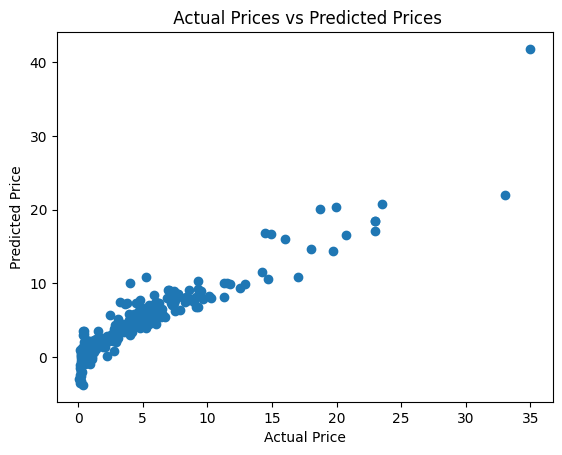

In [26]:
plt.scatter (y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
test_data_prediction = lin_reg_model.predict(x_test)

In [28]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R square :",error_score)

R square : 0.8365766715026374


### Visualisation of test data prediction

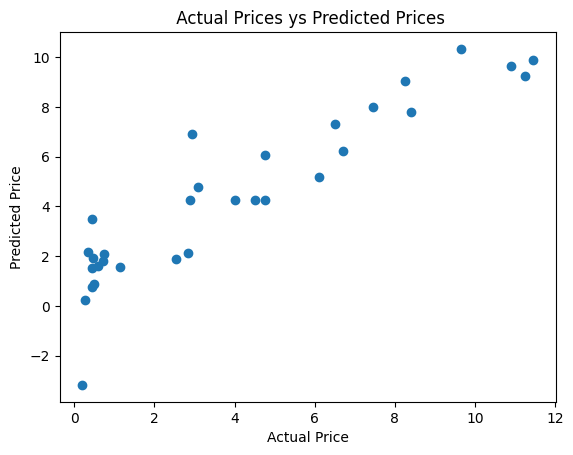

In [29]:
plt.scatter (y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices ys Predicted Prices")
plt.show()

## Xgboost Model

In [30]:
xgboost_model = XGBRegressor(n_estimators=20,max_depth=5)

In [31]:
xgboost_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
training_data_prediction_xgb = xgboost_model.predict(x_train)

In [33]:
error_score = metrics.r2_score(y_train, training_data_prediction_xgb)
print("R square : ",error_score)

R square :  0.9969328806002492


In [34]:
test_data_prediction_xgb = xgboost_model.predict(x_test)

In [35]:
error_score = metrics.r2_score(y_test,test_data_prediction_xgb)
print("R square :",error_score)

R square : 0.9780908787257047


### Visualisation of test data prediction

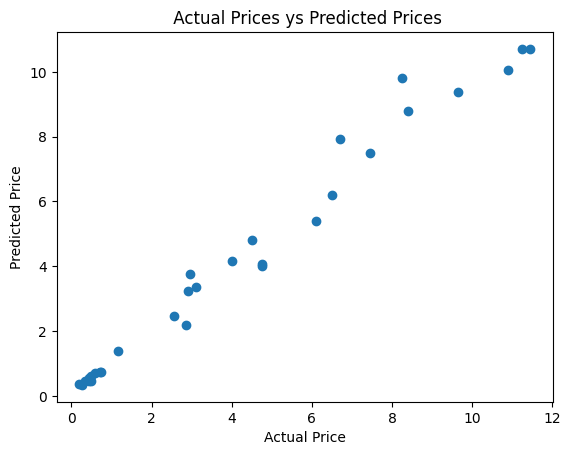

In [36]:
plt.scatter (y_test, test_data_prediction_xgb)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices ys Predicted Prices")
plt.show()

In [37]:
test_data_prediction_xgb, y_test

(array([ 9.372689  ,  0.5601705 ,  4.00153   ,  3.3476503 , 10.696451  ,
         4.800707  ,  3.77314   ,  6.2039456 ,  0.3389033 ,  5.409049  ,
         7.9250283 ,  4.065261  ,  0.46503952,  8.7961    ,  2.476677  ,
         0.7242959 ,  0.74875534,  0.47021806, 10.706591  ,  4.173256  ,
         1.3912672 ,  9.816421  ,  0.4457586 , 10.042938  ,  0.6283356 ,
         7.480521  ,  0.708455  ,  0.35295218,  3.2328942 ,  2.1893597 ,
         0.5038609 ], dtype=float32),
 99      9.65
 161     0.45
 89      4.75
 30      3.10
 232    11.45
 290     4.50
 35      2.95
 7       6.50
 183     0.27
 13      6.10
 269     6.70
 65      4.75
 178     0.35
 258     8.40
 227     2.55
 133     0.72
 130     0.75
 156     0.48
 237    11.25
 262     4.00
 112     1.15
 282     8.25
 164     0.45
 275    10.90
 154     0.50
 29      7.45
 141     0.60
 192     0.20
 216     2.90
 3       2.85
 159     0.45
 Name: Selling_Price, dtype: float64)

## Random Forest Model

In [38]:
rand_forest_model = RandomForestRegressor()

In [39]:
rand_forest_model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
training_data_prediction_rf = rand_forest_model.predict(x_train)

In [43]:
error_score = metrics.r2_score(y_train, training_data_prediction_rf)
print("R square : ",error_score)

R square :  0.9866689969703079


In [44]:
test_data_prediction_rf = rand_forest_model.predict(x_test)

In [45]:
error_score = metrics.r2_score(y_test, test_data_prediction_rf)
print("R square : ",error_score)

R square :  0.9815908615200943


### Visualisation of test data prediction

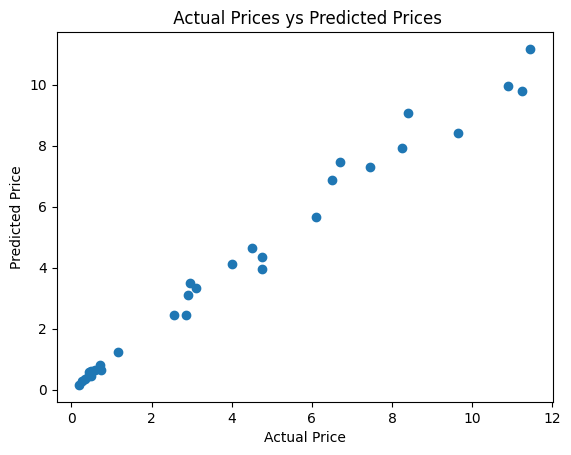

In [46]:
plt.scatter (y_test, test_data_prediction_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices ys Predicted Prices")
plt.show()

In [47]:
x_train.iloc[0]

Year              2015.00
Present_Price        4.43
Kms_Driven       28282.00
Fuel_Type            0.00
Seller_Type          0.00
Transmission         0.00
Owner                0.00
Name: 204, dtype: float64

## Prediction of Unseen data
#### The 'arr' array represents data not seen by the model during training.

In [48]:
arr = [[2017,15.5,2389,0,0,0,1]]

In [51]:
rand_forest_model.predict(arr)

C:\Users\raksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([13.3223])

In [52]:
xgboost_model.predict(arr)

array([14.729027], dtype=float32)